In [127]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [128]:
df = pd.read_csv('economic_index.csv')

In [129]:
df.head(
    
)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [130]:
## dropping unneccessary column
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [131]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [132]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

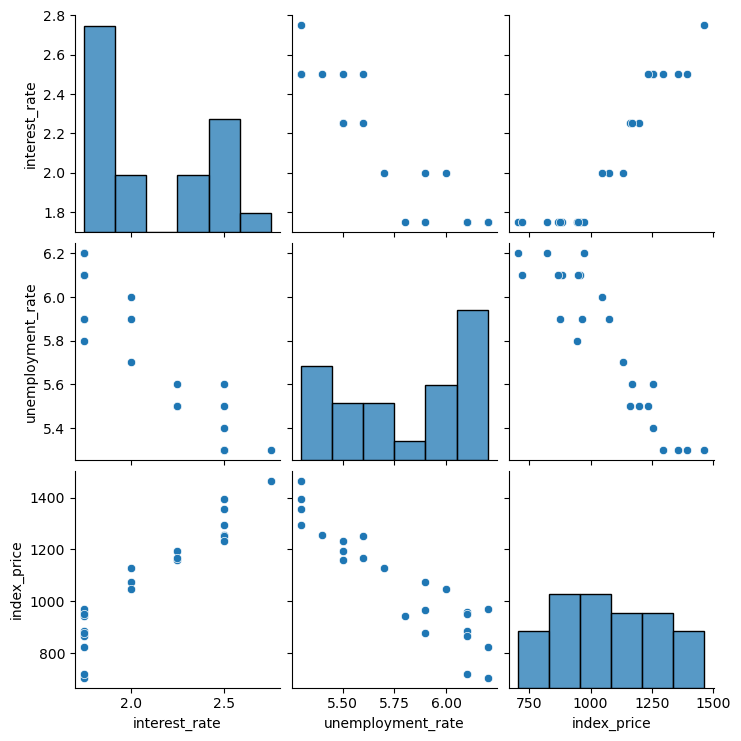

In [133]:
## visualization
import seaborn as sns;
sns.pairplot(df)
plt.show()

In [134]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


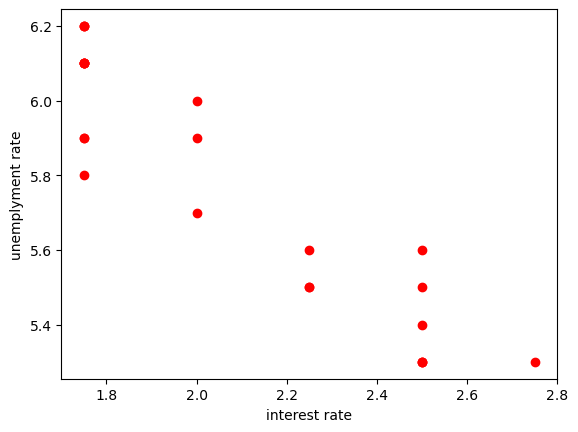

In [135]:
## visulize the dp more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color = 'r')
plt.xlabel("interest rate")
plt.ylabel("unemplyment rate")
plt.show()

In [136]:
##independ and dependent features
x= df.iloc[:,:-1]
y = df.iloc[:,-1]

In [137]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [138]:
x.shape,y.shape

((24, 2), (24,))

In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [140]:
x_train.shape,y_train.shape

((18, 2), (18,))

In [141]:
import seaborn as sns

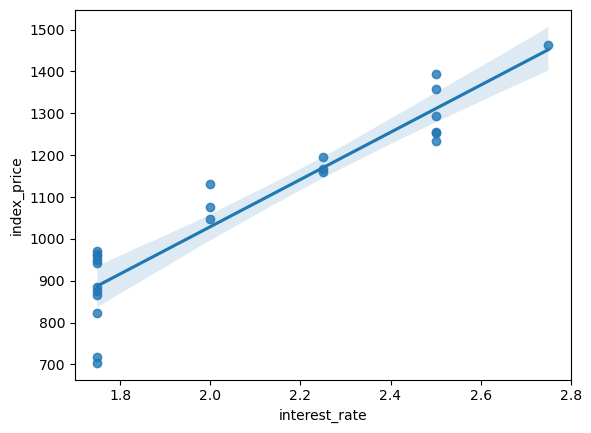

In [142]:
sns.regplot(x='interest_rate', y='index_price', data=df)
plt.show()

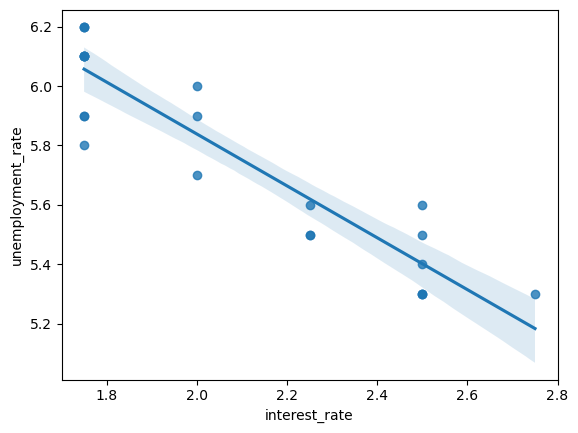

In [143]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)
plt.show()

In [144]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)


In [145]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [146]:
x_train.shape

(18, 2)

In [147]:
regression.fit(x_train,y_train)

LinearRegression()

In [148]:

from sklearn.model_selection import cross_val_score


In [149]:

## Cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [150]:
np.mean(validation_score)

-5914.828180162388

In [151]:
## predications
y_pred = regression.predict(x_test)

In [152]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [153]:
from sklearn.metrics import mean_absolute_error,mean_squared_error;
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712583
59.93578152323558
76.11677139574815


In [154]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.8278978091457141


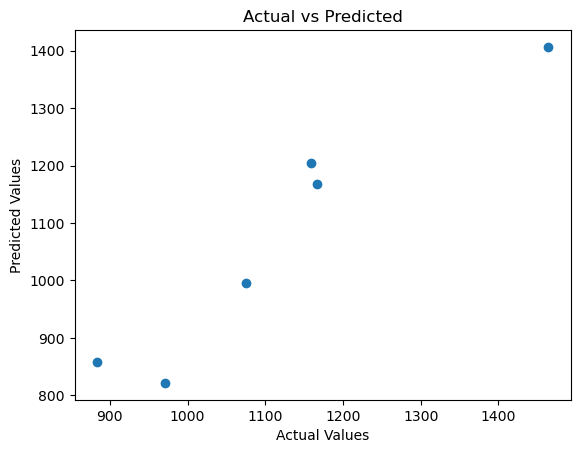

In [155]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


In [156]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


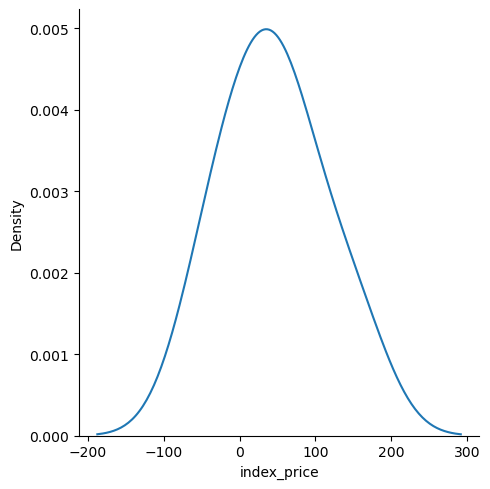

In [160]:
sns.displot(residuals,kind='kde')
plt.show()

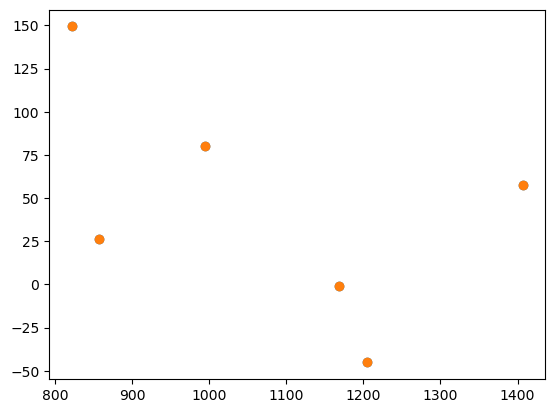

In [162]:
plt.scatter(y_pred,residuals)
plt.show()